# Q2. Mobile Price Classification

In [ ]:
%matplotlib inline
from keras.utils.vis_utils import plot_model
from keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [ ]:
#./gdrive/MyDrive/Colab Notebooks/data.txt
data = pd.read_csv("./drive/MyDrive/dataset.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print(data.shape)
train=[]
for i in range(data.shape[0]):
  train.append(list(data.iloc[i]))

(2000, 21)


In [ ]:
x=[]
y=[]
for i in train:
  y.append(i[-1])
  x.append(i[:20])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_train)
print(y_train)

[[1.412e+03 1.000e+00 2.400e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [8.080e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.619e+03 1.000e+00 9.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.872e+03 1.000e+00 2.300e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.133e+03 0.000e+00 1.400e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.242e+03 1.000e+00 2.400e+00 ... 1.000e+00 0.000e+00 0.000e+00]]
[1. 0. 0. ... 2. 1. 0.]


In [ ]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)
print(y_test)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(300, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
### YOU HAVE TO MAKE YOUR CHANGES HERE !!!
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=250,
                    batch_size=32,
                    verbose=1,
                    validation_data=(x_test,y_test))

50/50 [==============================] - 0s 5ms/step - loss: 0.5727 - accuracy: 0.7350 - val_loss: 0.5774 - val_accuracy: 0.7350
Epoch 118/250
50/50 [==============================] - 0s 5ms/step - loss: 0.5698 - accuracy: 0.7556 - val_loss: 0.5791 - val_accuracy: 0.7400
Epoch 119/250
50/50 [==============================] - 0s 5ms/step - loss: 0.5801 - accuracy: 0.7556 - val_loss: 0.5728 - val_accuracy: 0.7225
Epoch 120/250
50/50 [==============================] - 0s 5ms/step - loss: 0.5789 - accuracy: 0.7400 - val_loss: 0.5477 - val_accuracy: 0.7550
Epoch 121/250
50/50 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.7506 - val_loss: 0.5605 - val_accuracy: 0.7425
Epoch 122/250
50/50 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.7450 - val_loss: 0.5450 - val_accuracy: 0.7425
Epoch 123/250
50/50 [==============================] - 0s 5ms/step - loss: 0.5629 - accuracy: 0.7469 - val_loss: 0.6204 - val_accuracy: 0.7175
Epoch 124/250

In [ ]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7775


[0.5156118869781494, 0.7774999737739563]

Text(0.5, 1.0, 'Training and validation loss')

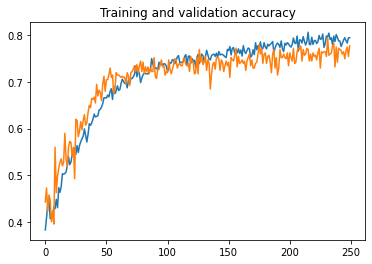

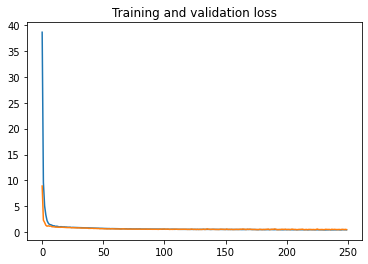

In [ ]:
from matplotlib import pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Q3. Choose loss and activation function

In [56]:
import tensorflow as tf
import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(
    path="reuters.npz",
    num_words=1000,
    skip_top=0,
    maxlen=None,
    test_split=0.2,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)

In [57]:
print(x_train)
print(y_train)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13, 4, 346, 48, 235, 62

In [58]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
%matplotlib inline
from keras.utils.vis_utils import plot_model
from keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [60]:
model = Sequential()
model.add(Flatten(input_shape=(1000, )))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=512,
                     verbose=1,
                     validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 16ms/step - loss: 0.6063 - accuracy: 0.0053 - val_loss: 0.4293 - val_accuracy: 0.0045
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 0.3105 - accuracy: 0.0080 - val_loss: 0.1512 - val_accuracy: 0.0214
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.1385 - accuracy: 0.2330 - val_loss: 0.0962 - val_accuracy: 0.5009
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 0.1014 - accuracy: 0.3508 - val_loss: 0.0769 - val_accuracy: 0.4924
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0833 - accuracy: 0.4340 - val_loss: 0.0658 - val_accuracy: 0.5209
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0723 - accuracy: 0.4849 - val_loss: 0.0593 - val_accuracy: 0.5423
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0658 - accuracy: 0.5209 - val_loss: 0.0550 - val_accuracy: 0.5663
Epoch 8/20
18/18 [=

In [61]:
test_loss1, test_accuracy1 = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.7222


In [46]:
model = Sequential()
model.add(Flatten(input_shape=(1000, )))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 18ms/step - loss: 3.4420 - accuracy: 0.2351 - val_loss: 2.8312 - val_accuracy: 0.4443
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 2.4192 - accuracy: 0.4951 - val_loss: 1.9182 - val_accuracy: 0.5708
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 1.7828 - accuracy: 0.5878 - val_loss: 1.5896 - val_accuracy: 0.6416
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 1.5147 - accuracy: 0.6511 - val_loss: 1.4163 - val_accuracy: 0.6696
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 1.3573 - accuracy: 0.6845 - val_loss: 1.3112 - val_accuracy: 0.6892
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 1.2543 - accuracy: 0.7057 - val_loss: 1.2362 - val_accuracy: 0.7079
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 1.1618 - accuracy: 0.7282 - val_loss: 1.1782 - val_accuracy: 0.7257
Epoch 8/20
18/18 [=

In [47]:
test_loss2, test_accuracy2 = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9208 - accuracy: 0.7841


In [48]:
model = Sequential()
model.add(Flatten(input_shape=(1000, )))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history3 = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 14ms/step - loss: 0.1849 - accuracy: 0.0556 - val_loss: 0.0956 - val_accuracy: 0.1518
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0613 - accuracy: 0.1022 - val_loss: 0.0238 - val_accuracy: 0.4350
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.2986 - val_loss: 0.0165 - val_accuracy: 0.4920
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 0.4227 - val_loss: 0.0144 - val_accuracy: 0.5289
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0157 - accuracy: 0.4747 - val_loss: 0.0132 - val_accuracy: 0.5303
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.5033 - val_loss: 0.0124 - val_accuracy: 0.5325
Epoch 7/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 0.5197 - val_loss: 0.0121 - val_accuracy: 0.5361
Epoch 8/20
18/18 [=

In [49]:
test_loss3, test_accuracy3 = model.evaluate(x_test, y_test)


71/71 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.5445


In [50]:
model = Sequential()
model.add(Flatten(input_shape=(1000, )))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='./logs4', profile_batch=5)
history4 = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 14ms/step - loss: 0.0207 - accuracy: 0.2595 - val_loss: 0.0192 - val_accuracy: 0.4973
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0163 - accuracy: 0.5032 - val_loss: 0.0124 - val_accuracy: 0.5637
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.5835 - val_loss: 0.0107 - val_accuracy: 0.6149
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0104 - accuracy: 0.6309 - val_loss: 0.0098 - val_accuracy: 0.6603
Epoch 5/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0095 - accuracy: 0.6757 - val_loss: 0.0092 - val_accuracy: 0.6812
Epoch 6/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.6975 - val_loss: 0.0089 - val_accuracy: 0.6861
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.7114 - val_loss: 0.0088 - val_accuracy: 0.6923
Epoch 8/20
18/18 [=

In [51]:
test_loss4, test_accuracy4 = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.7480


In [52]:
model = Sequential()
model.add(Flatten(input_shape=(1000, )))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='./logs5', profile_batch=5)
history5 = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 1s 16ms/step - loss: 0.0288 - accuracy: 0.2095 - val_loss: 0.0197 - val_accuracy: 0.4274
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.4372 - val_loss: 0.0168 - val_accuracy: 0.4898
Epoch 3/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 0.4875 - val_loss: 0.0150 - val_accuracy: 0.5156
Epoch 4/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0157 - accuracy: 0.5100 - val_loss: 0.0140 - val_accuracy: 0.5307
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0147 - accuracy: 0.5360 - val_loss: 0.0131 - val_accuracy: 0.5512
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0138 - accuracy: 0.5558 - val_loss: 0.0123 - val_accuracy: 0.5677
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 0.5668 - val_loss: 0.0118 - val_accuracy: 0.5761
Epoch 8/20
18/18 [=

In [53]:
test_loss5, test_accuracy5 = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.6309


In [54]:
print("loss 1:", test_loss1, "accuracy 1:", test_accuracy1)
print("loss 2:", test_loss2, "accuracy 2:", test_accuracy2)
print("loss 3:", test_loss3, "accuracy 3:", test_accuracy3)
print("loss 4:", test_loss4, "accuracy 4:", test_accuracy4)
print("loss 5:", test_loss5, "accuracy 5:", test_accuracy5)

loss 1: 0.0366843082010746 accuracy 1: 0.7217274904251099
loss 2: 0.920823335647583 accuracy 2: 0.784060537815094
loss 3: 0.011005123145878315 accuracy 3: 0.5445235967636108
loss 4: 0.007502493914216757 accuracy 4: 0.74799644947052
loss 5: 0.010472523048520088 accuracy 5: 0.6308993697166443


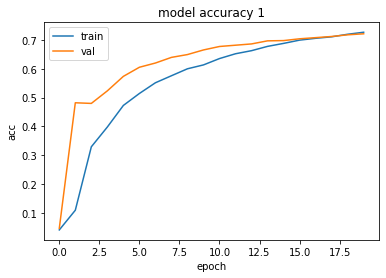

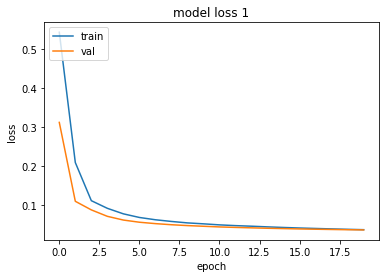

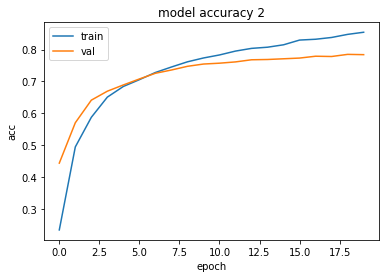

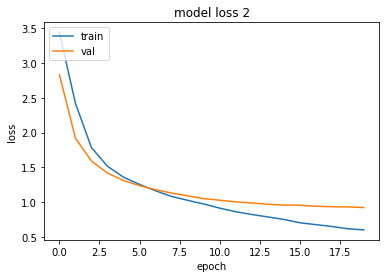

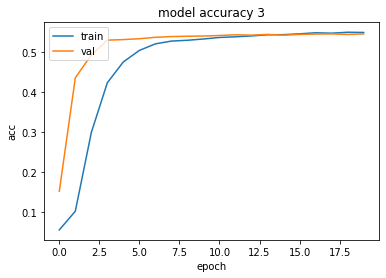

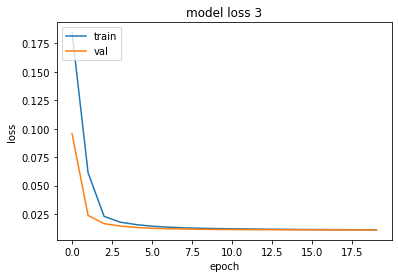

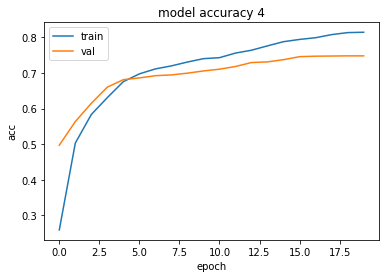

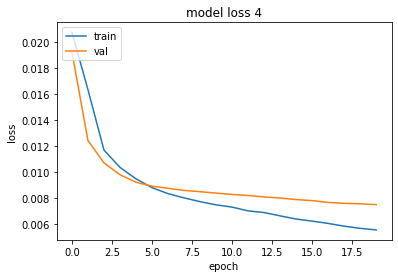

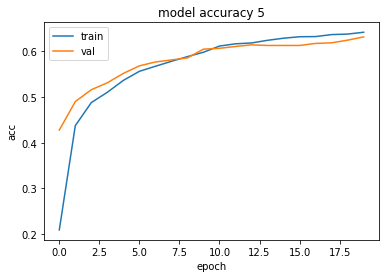

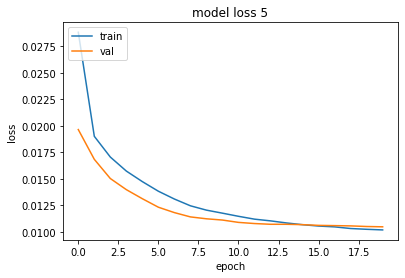

In [55]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy 1')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy 2')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy 3')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy 4')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss 4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy 5')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss 5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()